In [1]:
from PhyloProPy.PhyloProfile import PhyloProfile

size = 'small'

if size == 'small':
    path  = 'PhyloProPy/data/small.phyloprofile'
    pp = PhyloProfile(path=path, reference=8032)

pp.display()

2024-03-13 16:25:46 - INFO - Reading NCBI Taxonomy
2024-03-13 16:25:46 - INFO - Initializing PhyloProfile matrix
2024-03-13 16:25:46 - INFO - Reordering matrix according to "8032"
2024-03-13 16:25:46 - INFO - Loading PhyloProfile matrix


,ncbi8032,ncbi8030,ncbi74940,ncbi8019,ncbi8018,ncbi8022,ncbi8023,ncbi8040,ncbi2691554,ncbi59861,...,ncbi224911,ncbi208964,ncbi515635,ncbi189518,ncbi190304,ncbi243090,ncbi226186,ncbi374847,ncbi273057,ncbi64091
rdh13,1.00000,0.99787,0.70740,0.70430,0.72035,0.70326,0.70910,0.99973,0.99973,0.99970,...,0.65158,0.70472,0.54139,0.00000,0.00,0.73515,0.50097,0.00000,0.00000,0.67239
LOC115163766,1.00000,0.00000,0.99994,0.84573,0.87169,0.98608,0.99934,0.98612,0.00000,0.00000,...,0.06088,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115156921,0.99982,0.99991,0.98848,0.98989,0.92109,0.98845,0.99025,0.99583,0.98944,0.88611,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
ddit4,1.00000,1.00000,0.93281,0.94741,0.71344,0.93152,0.94491,0.93983,0.92805,0.81626,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115159618,1.00000,0.99841,0.99844,0.99850,0.99841,0.99823,0.99850,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115168537,1.00000,0.89247,0.61721,0.89694,0.88875,0.89332,0.74689,0.88527,0.87592,0.72871,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115151918,0.99562,0.99562,0.99523,0.99565,0.99568,0.54662,0.99544,0.86610,0.00000,0.99532,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115172565,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.98032,...,0.00000,0.00000,0.00000,0.00000,0.64,0.00000,0.00000,0.63369,0.66241,0.00000
LOC115150216,1.00000,0.95704,0.96527,0.96759,0.99916,0.96530,0.46003,0.99937,0.99790,0.58922,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
hgsnat,0.92518,0.91006,0.91990,0.92602,0.95841,0.92011,0.90397,0.92197,0.00000,0.97366,...,0.00000,0.00000,0.00000,0.32724,0.00,0.00000,0.32268,0.00000,0.00000,0.00000


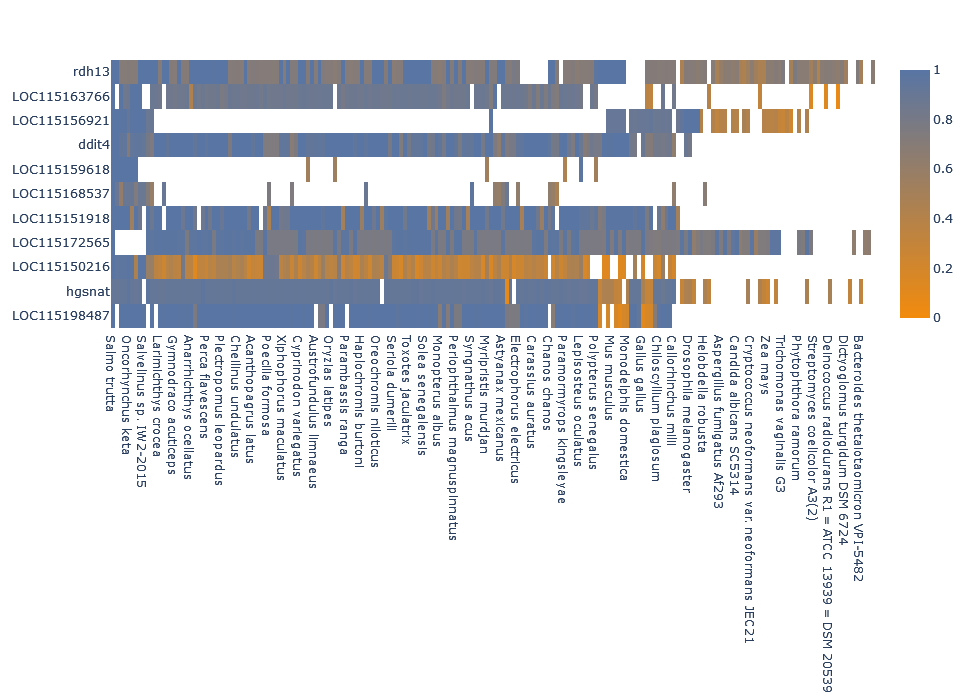

In [9]:
fig = pp.plot(height=700)
fig.show()

In [3]:
pp.display()

,ncbi8032,ncbi8030,ncbi74940,ncbi8019,ncbi8018,ncbi8022,ncbi8023,ncbi8040,ncbi2691554,ncbi59861,...,ncbi224911,ncbi208964,ncbi515635,ncbi189518,ncbi190304,ncbi243090,ncbi226186,ncbi374847,ncbi273057,ncbi64091
rdh13,1.00000,0.99787,0.70740,0.70430,0.72035,0.70326,0.70910,0.99973,0.99973,0.99970,...,0.65158,0.70472,0.54139,0.00000,0.00,0.73515,0.50097,0.00000,0.00000,0.67239
LOC115163766,1.00000,0.00000,0.99994,0.84573,0.87169,0.98608,0.99934,0.98612,0.00000,0.00000,...,0.06088,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115156921,0.99982,0.99991,0.98848,0.98989,0.92109,0.98845,0.99025,0.99583,0.98944,0.88611,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
ddit4,1.00000,1.00000,0.93281,0.94741,0.71344,0.93152,0.94491,0.93983,0.92805,0.81626,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115159618,1.00000,0.99841,0.99844,0.99850,0.99841,0.99823,0.99850,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115168537,1.00000,0.89247,0.61721,0.89694,0.88875,0.89332,0.74689,0.88527,0.87592,0.72871,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115151918,0.99562,0.99562,0.99523,0.99565,0.99568,0.54662,0.99544,0.86610,0.00000,0.99532,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
LOC115172565,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.98032,...,0.00000,0.00000,0.00000,0.00000,0.64,0.00000,0.00000,0.63369,0.66241,0.00000
LOC115150216,1.00000,0.95704,0.96527,0.96759,0.99916,0.96530,0.46003,0.99937,0.99790,0.58922,...,0.00000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000
hgsnat,0.92518,0.91006,0.91990,0.92602,0.95841,0.92011,0.90397,0.92197,0.00000,0.97366,...,0.00000,0.00000,0.00000,0.32724,0.00,0.00000,0.32268,0.00000,0.00000,0.00000
